In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.cluster import KMeans

from imblearn.over_sampling import SMOTE
# Import label encoder 
from sklearn import preprocessing 

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\Kavita Jain\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('./world-happiness-report-2019.csv')
#test = pd.read_csv('./cs-test.csv')


In [3]:
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
data.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect', 'Negative affect', 'Social support', 'Freedom', 'Corruption', 'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'], dtype='object')

In [5]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [6]:
data.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [8]:
data.tail()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0
155,South Sudan,156,140,127.0,152.0,148.0,154.0,61.0,85.0,140.0,143.0


In [9]:
#Remove space from column names
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('\n', '')
data.head()

,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [10]:
data.columns

Index(['Country(region)', 'Ladder', 'SDofLadder', 'Positiveaffect', 'Negativeaffect', 'Socialsupport', 'Freedom', 'Corruption', 'Generosity', 'LogofGDPpercapita', 'Healthylifeexpectancy'], dtype='object')

In [11]:
data.loc[data.LogofGDPpercapita == 1]

,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [12]:
data['Positiveaffect'].value_counts

for i in range(0, 157):
    if i not in data['Positiveaffect'] :
        print(i)

156


In [13]:
data.loc[data['Socialsupport'].isnull()]

,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


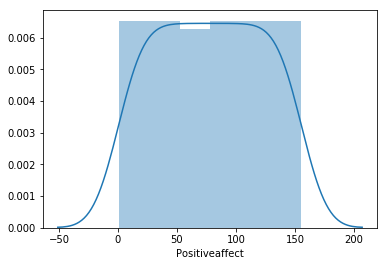

In [14]:
sns.distplot(data.loc[~data['Positiveaffect'].isnull(), 'Positiveaffect'])
plt.show()

In [15]:

data.Positiveaffect.sort_values()
#All values are in sequence, 156 is missing, assigning that value

data.loc[data['Positiveaffect'].isnull(), 'Positiveaffect'] = 156

In [16]:
data.Negativeaffect.sort_values()
#All values are in sequence, 156 is missing, assigning that value

data.loc[data['Negativeaffect'].isnull(), 'Negativeaffect'] = 156

In [17]:

data.Socialsupport.sort_values()
#All values are in sequence, 156 is missing, assigning that value

data.loc[data['Socialsupport'].isnull(), 'Socialsupport'] = 156

In [18]:

data.Freedom.sort_values()
#All values are in sequence, 156 is missing, assigning that value

data.loc[data['Freedom'].isnull(), 'Freedom'] = 156

In [19]:


data.Generosity.sort_values()
#All values are in sequence, 156 is missing, assigning that value

data.loc[data['Generosity'].isnull(), 'Generosity'] = 156

In [20]:
data.isnull().sum()

Country(region)          0
Ladder                   0
SDofLadder               0
Positiveaffect           0
Negativeaffect           0
Socialsupport            0
Freedom                  0
Corruption               8
Generosity               0
LogofGDPpercapita        4
Healthylifeexpectancy    6
dtype: int64

In [21]:
# = 156

data.loc[data['Corruption'].isnull(), 'Corruption'] = data.Corruption.mean(skipna=True)

data.loc[data['LogofGDPpercapita'].isnull(), 'LogofGDPpercapita'] = data.LogofGDPpercapita.mean(skipna=True)

data.loc[data['Healthylifeexpectancy'].isnull(), 'Healthylifeexpectancy'] = data.Healthylifeexpectancy.mean(skipna=True)

In [22]:
data.isnull().sum()

Country(region)          0
Ladder                   0
SDofLadder               0
Positiveaffect           0
Negativeaffect           0
Socialsupport            0
Freedom                  0
Corruption               0
Generosity               0
LogofGDPpercapita        0
Healthylifeexpectancy    0
dtype: int64

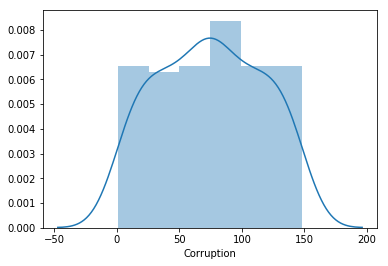

In [23]:
sns.distplot(data.loc[~data['Corruption'].isnull(), 'Corruption'])
plt.show()

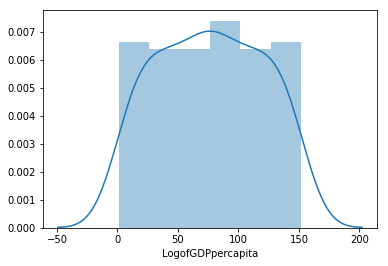

In [24]:
sns.distplot(data.loc[~data['LogofGDPpercapita'].isnull(), 'LogofGDPpercapita'])
plt.show()

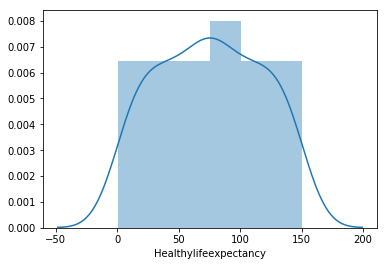

In [25]:
sns.distplot(data.loc[~data['Healthylifeexpectancy'].isnull(), 'Healthylifeexpectancy'])
plt.show()

In [26]:
data.loc[data['Corruption'].isnull()]

,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy


In [27]:
data.head()

,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


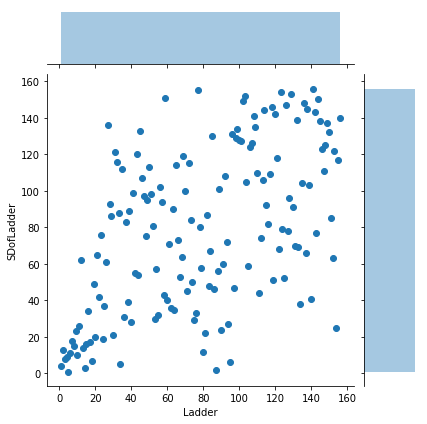

In [28]:
sns.jointplot('Ladder', 'SDofLadder', data)
plt.show()

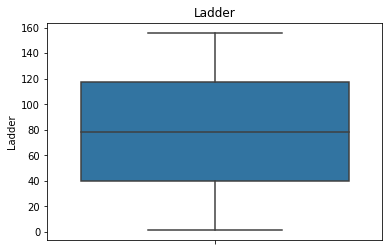

In [29]:


sns.boxplot(y=data['Ladder'])
plt.title('Ladder')

plt.show()

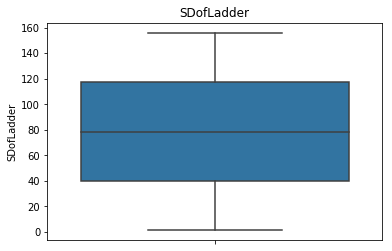

In [30]:
sns.boxplot(y=data['SDofLadder'])
plt.title('SDofLadder')

plt.show()

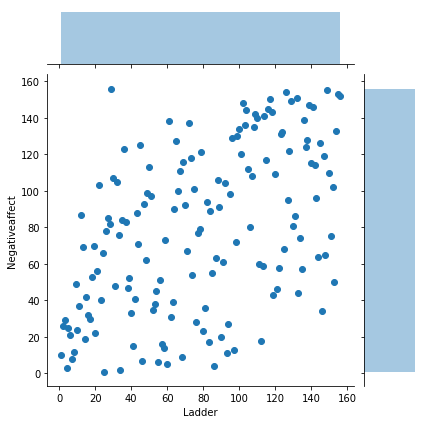

In [31]:
sns.jointplot('Ladder', 'Negativeaffect', data)
plt.show()

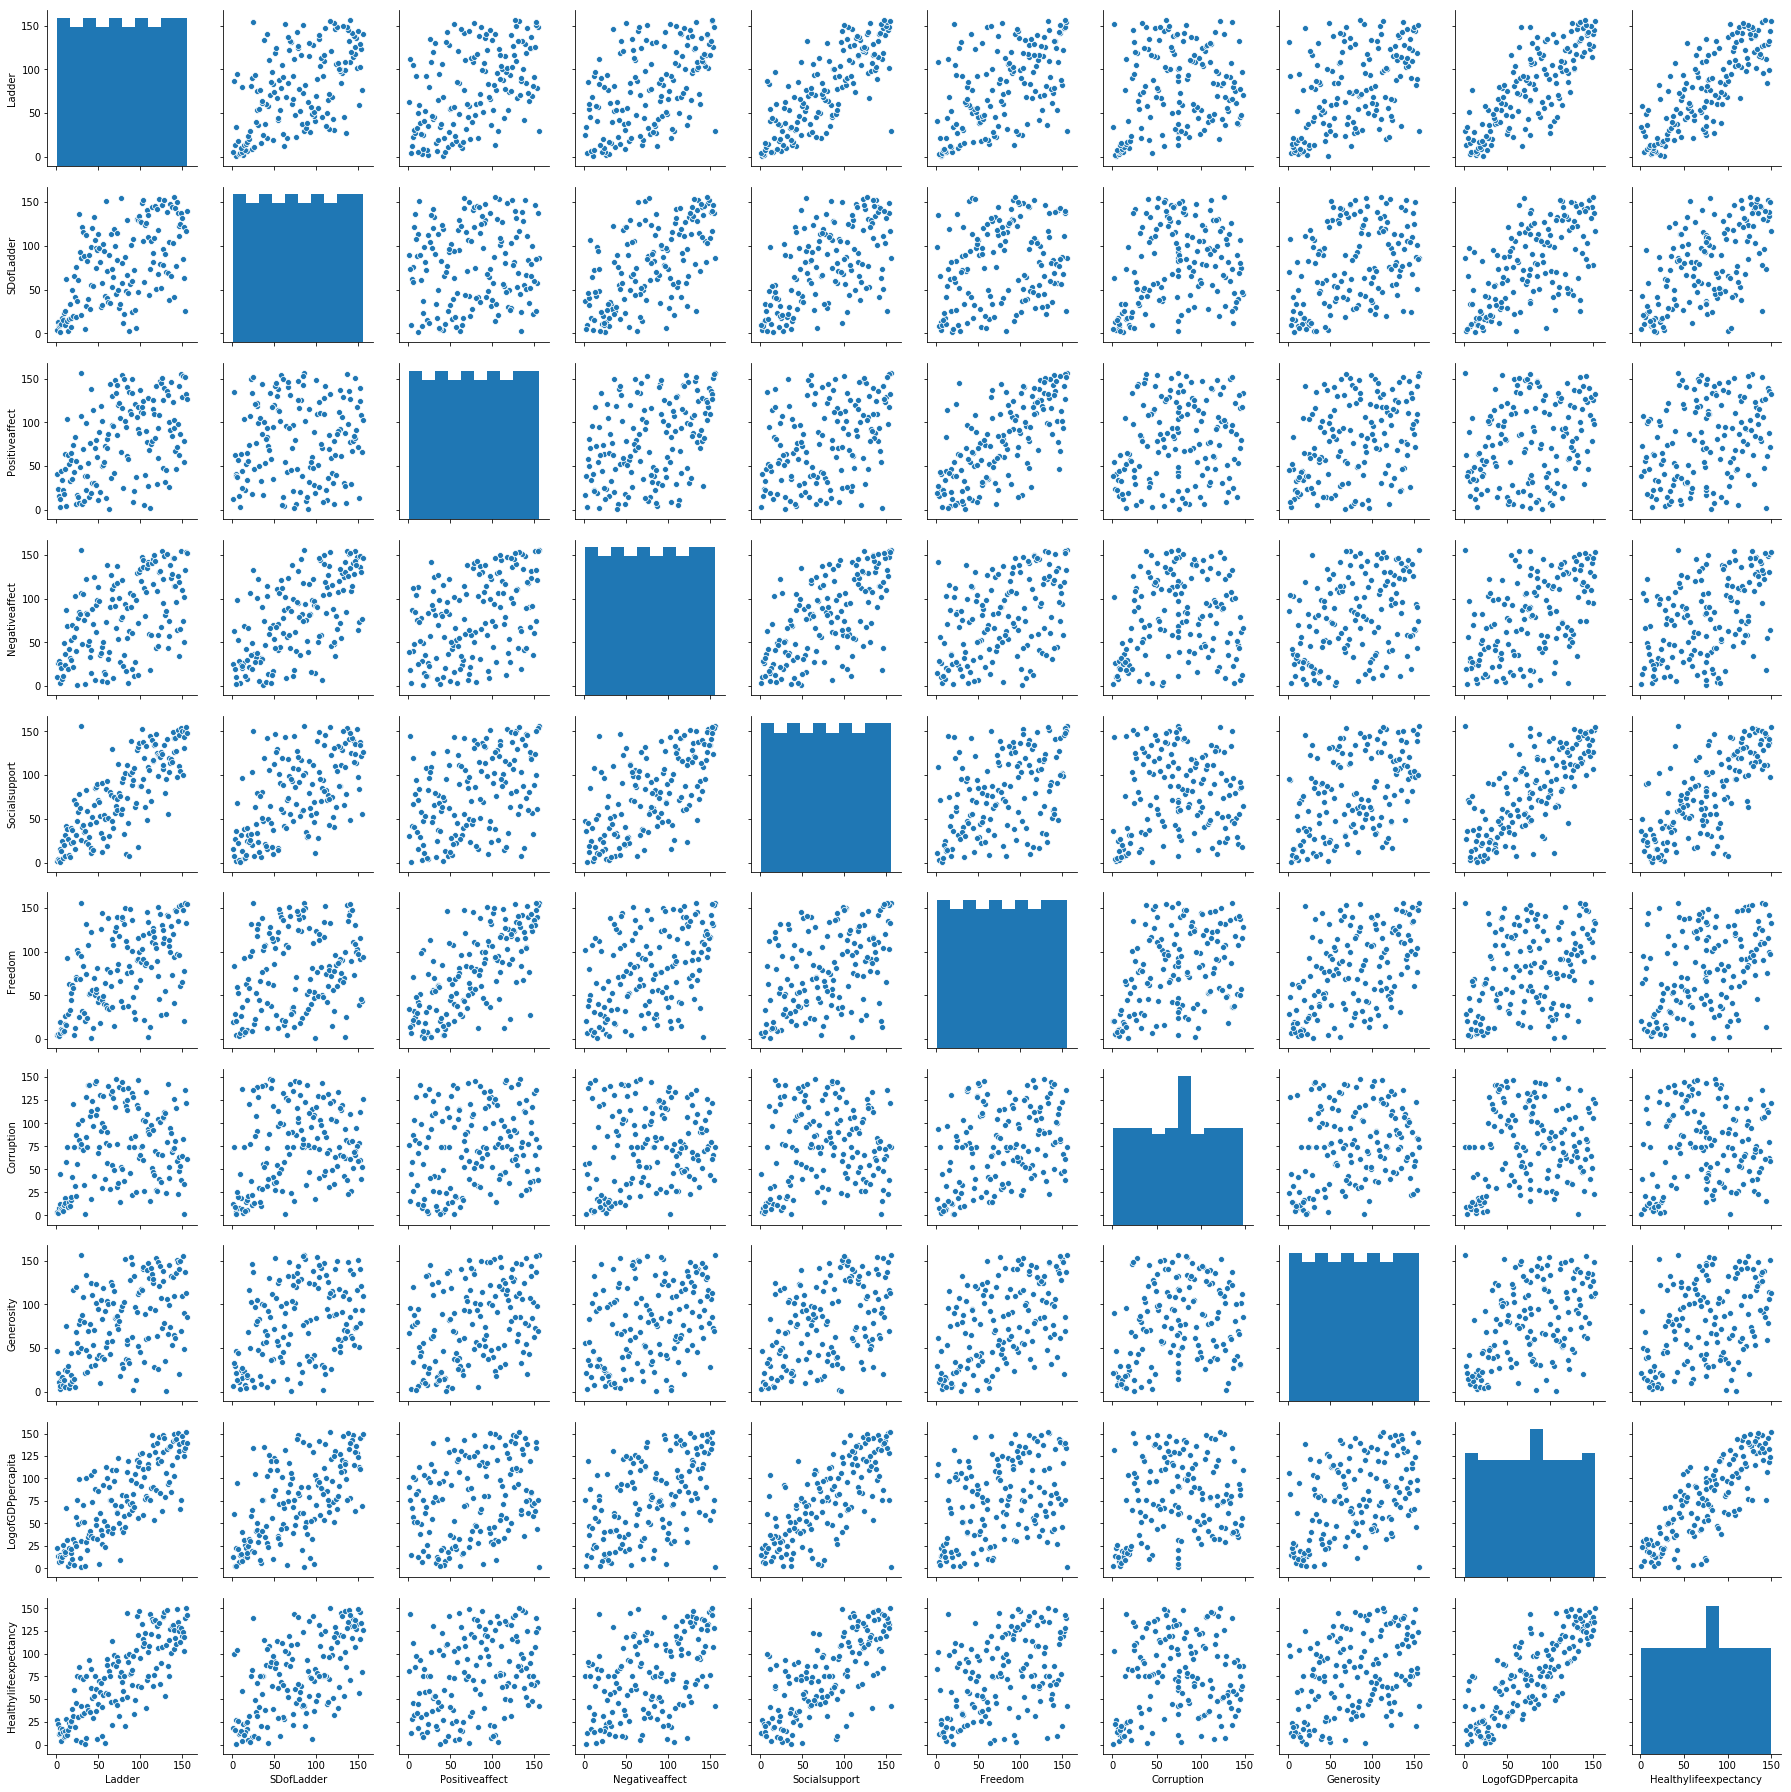

In [32]:
sns.pairplot(data)
plt.show()

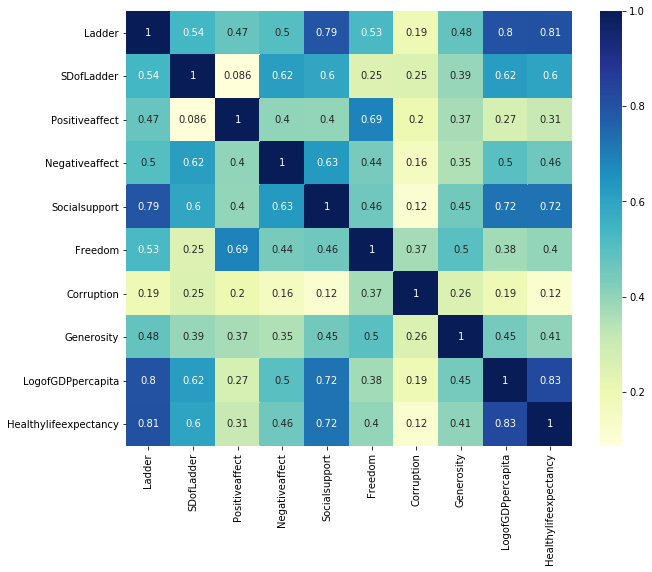

In [33]:
# figure size
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [34]:
data.head()

,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Text(0.5, 1.0, 'Average Sales')

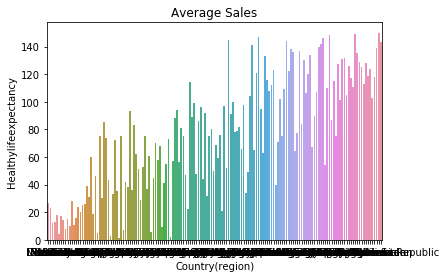

In [35]:
#Bar plot with x as country and y as Healthlifeexpec...

sns.barplot(x='Country(region)', y='Healthylifeexpectancy', data=data)
plt.title("Average Sales")

In [36]:
data['Country(region)'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad and Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajik

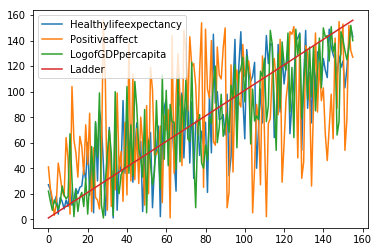

In [37]:
#Clustering can be applied - https://www.kaggle.com/akash07sky/world-happiness-report
data_plot = data.loc[:,["Healthylifeexpectancy","Positiveaffect", "LogofGDPpercapita","Ladder" ]]
data_plot.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF873C1400>,
      dtype=object)

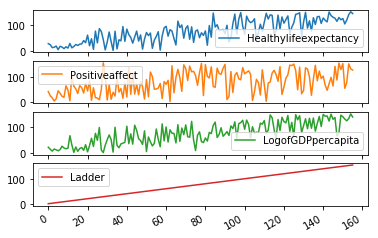

In [38]:
data_plot.plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF891B0B00>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

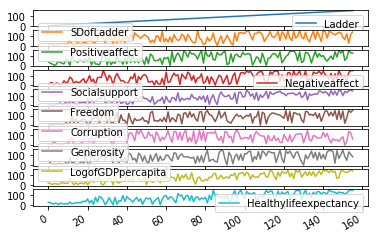

In [39]:
plt.figure(figsize=(20,20))
data_plot = data
data_plot.plot(subplots = True)

In [40]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
X = data.drop(['Country(region)'], axis=1)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Ladder', 'SDofLadder', 'Positiveaffect', 'Negativeaffect', 'Socialsupport', 'Freedom', 'Corruption', 'Generosity', 'LogofGDPpercapita', 'Healthylifeexpectancy'], dtype='object')

In [41]:
#KMeans clustering

#We need to first find out the K value, checking with Elbow method and silhouette_score both

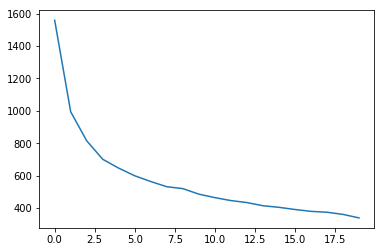

In [42]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

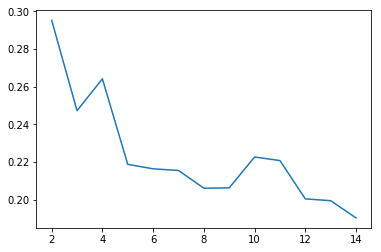

In [43]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [50]:
#Going ahead with 2 clusters as clear from silhouette_score, maximum value is at 2

#K-mean clustering

model_countr1 = KMeans(n_clusters = 2, max_iter=50, init='k-means++', n_init=1, verbose=0, random_state=3425)
model_countr1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=3425, tol=0.0001, verbose=0)

In [51]:
model_countr1.labels_
# analysis of clusters formed
#countries_n.index = pd.RangeIndex(len(countries_n.index))
data_1 = pd.concat([data, pd.Series(model_countr1.labels_)], axis=1)
data_1.rename(index=str,columns={0:'ClusterID'}, inplace=True)
data_1.head()


,Country(region),Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy,ClusterID
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,0


In [52]:
df_clusterId = data_1.groupby(['ClusterID']).mean()
df_clusterId

,Ladder,SDofLadder,Positiveaffect,Negativeaffect,Socialsupport,Freedom,Corruption,Generosity,LogofGDPpercapita,Healthylifeexpectancy
ClusterID,,,,,,,,,,
0,42.175676,51.162162,57.351351,48.581081,41.364865,54.540541,71.310811,55.243243,44.216216,44.135135
1,111.280488,103.170732,97.585366,105.500000,112.012195,100.121951,77.378049,99.487805,105.634146,103.804878


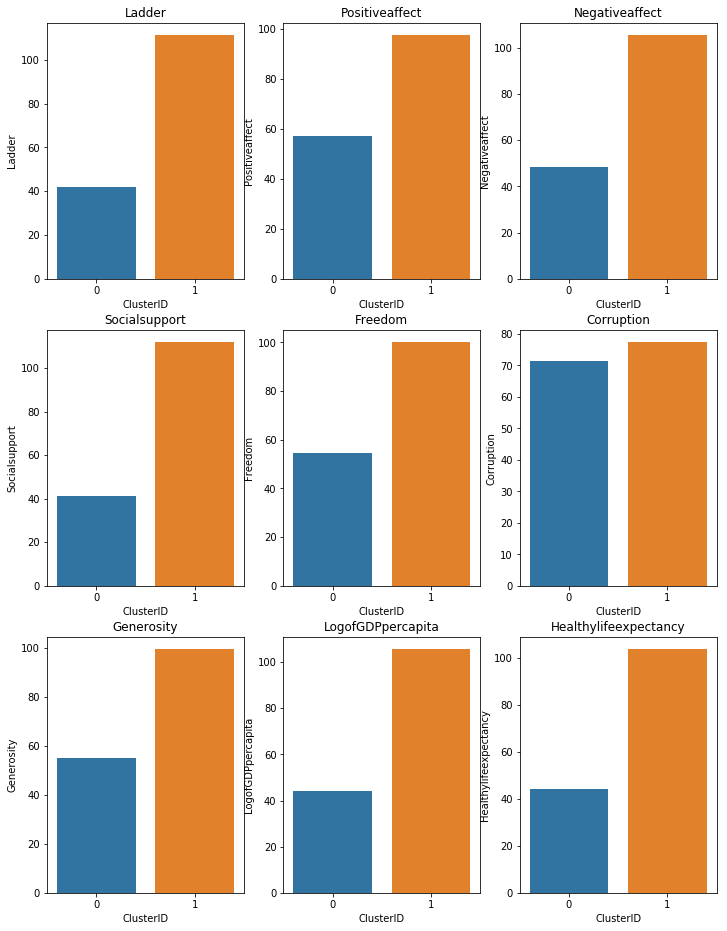

In [59]:
plt.figure(figsize=(12,16))

#Positive factors - exports, income, life_expec, gdpp
plt.subplot(3, 3, 1)
sns.barplot(x=df_clusterId.index, y='Ladder', data=df_clusterId)
plt.title("Ladder")


plt.subplot(3, 3, 2)
sns.barplot(x=df_clusterId.index, y='Positiveaffect', data=df_clusterId)
plt.title("Positiveaffect")

plt.subplot(3, 3, 3)
sns.barplot(x=df_clusterId.index, y='Negativeaffect', data=df_clusterId)
plt.title("Negativeaffect")

plt.subplot(3,3, 4)
sns.barplot(x=df_clusterId.index, y='Socialsupport', data=df_clusterId)
plt.title("Socialsupport")

plt.subplot(3,3, 5)
sns.barplot(x=df_clusterId.index, y='Freedom', data=df_clusterId)
plt.title("Freedom")

plt.subplot(3,3, 6)
sns.barplot(x=df_clusterId.index, y='Corruption', data=df_clusterId)
plt.title("Corruption")

plt.subplot(3,3, 7)
sns.barplot(x=df_clusterId.index, y='Generosity', data=df_clusterId)
plt.title("Generosity")

plt.subplot(3,3, 8)
sns.barplot(x=df_clusterId.index, y='LogofGDPpercapita', data=df_clusterId)
plt.title("LogofGDPpercapita")

plt.subplot(3,3, 9)
sns.barplot(x=df_clusterId.index, y='Healthylifeexpectancy', data=df_clusterId)
plt.title("Healthylifeexpectancy")


plt.show()

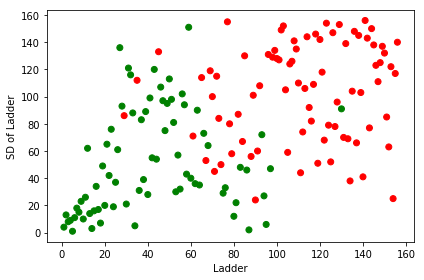

In [61]:
#Cluster Id using K-means
%matplotlib inline
fig = plt.figure(figsize = (6,4))
plt.scatter(data_1.Ladder, data_1.SDofLadder, c = data_1.ClusterID.map({0:'green',1:'red'}))


plt.xlabel('Ladder')
plt.ylabel('SD of Ladder')
plt.tight_layout()
plt.show()